In [507]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import torch

from tqdm import tqdm

sys.path.insert(0, "../")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [508]:
import src

In [509]:
def plot_bbox(ax, bbox, bbox_format="XYWH"):
    """bbox : bounding box for one sample, list of 4 values"""
    if bbox_format == "XYWH":
        cx, cy, w, h = bbox
        ax.scatter([cx], [cy], c='r')
        ax.plot(
            [cx-w/2, cx+w/2, cx+w/2, cx-w/2, cx-w/2], 
            [cy-h/2, cy-h/2, cy+h/2, cy+h/2, cy-h/2], 
            c='b')

# PennAction test (video frames only)

In [530]:
from src.datasets.pennaction import PennAction
seqlen = 4
ds = PennAction(seqlen=seqlen, output_types=["video", "bbox", "kp_2d", "kp_2d_orig"])

Loaded pennaction dataset from /cvlabsrc1/cvlab/dataset_PennAction/Penn_Action/../pennaction_train_scale12_db.pt
pennaction - number of dataset objects 40091


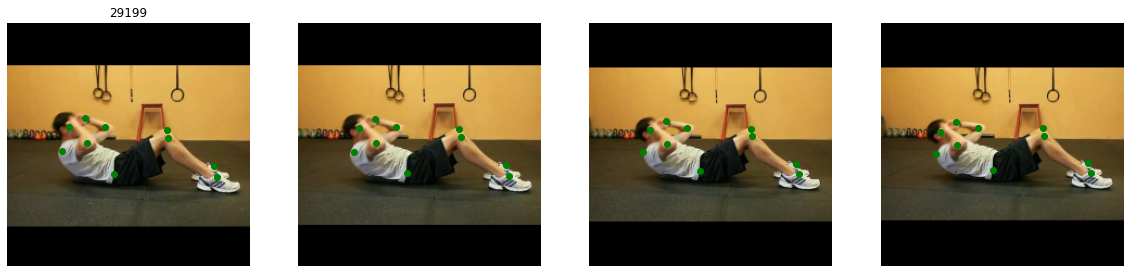

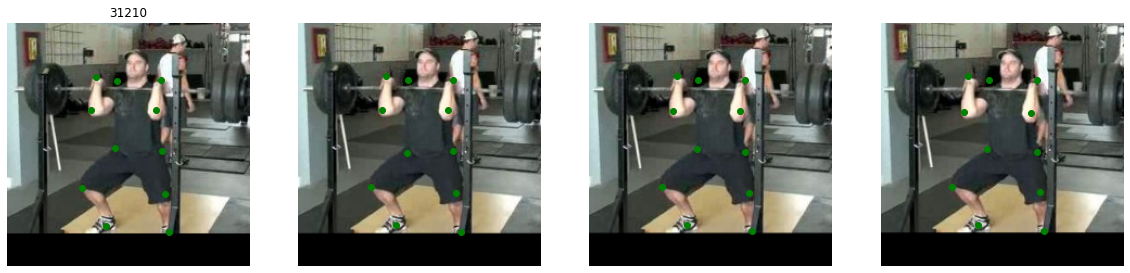

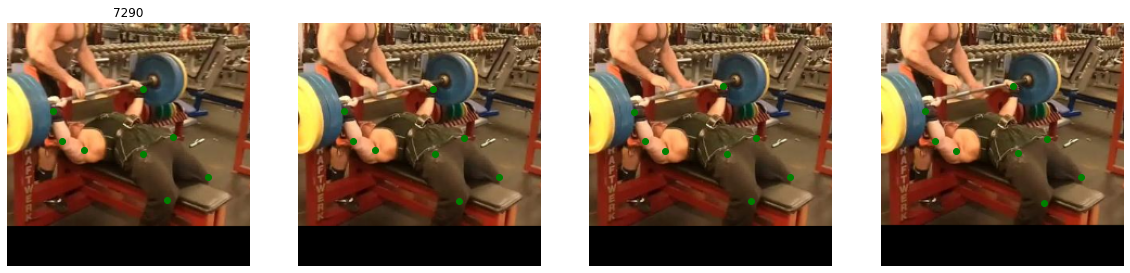

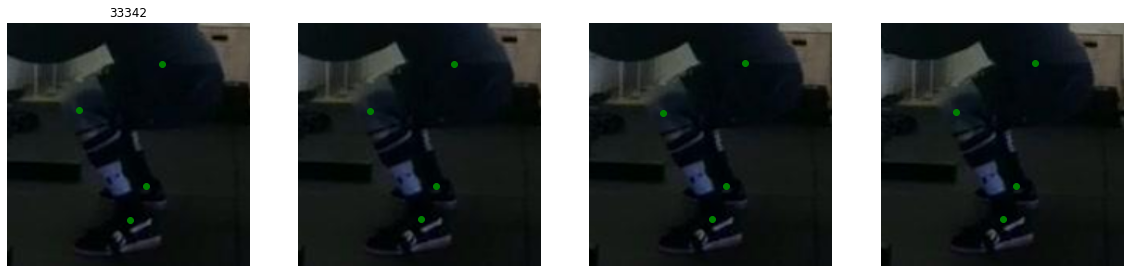

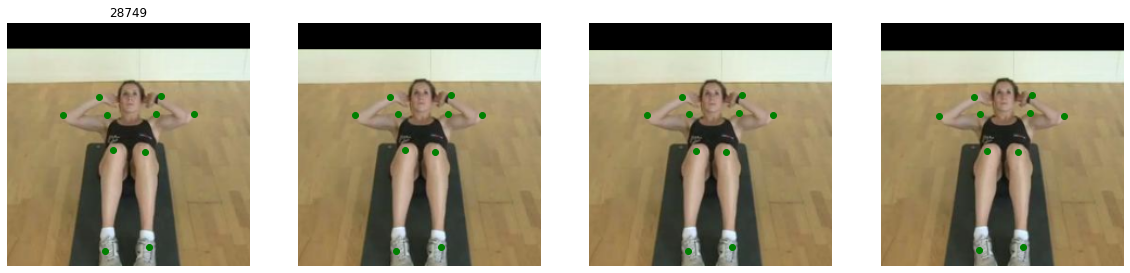

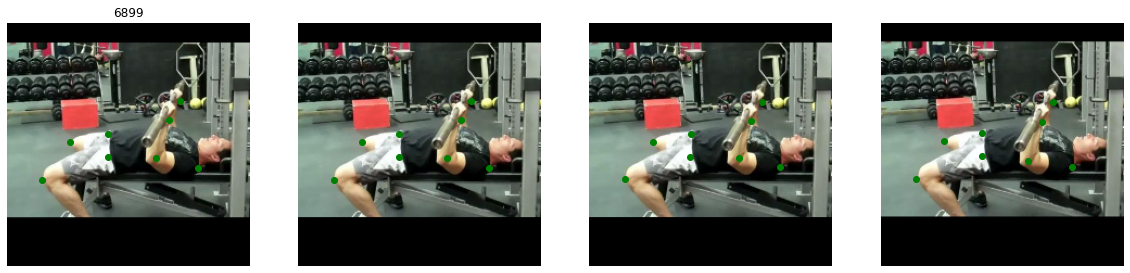

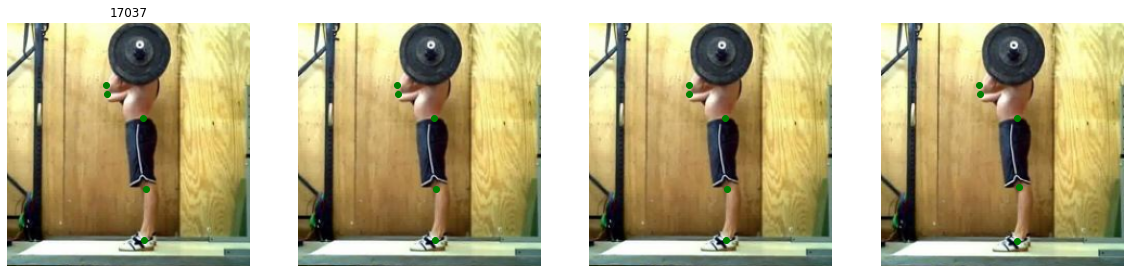

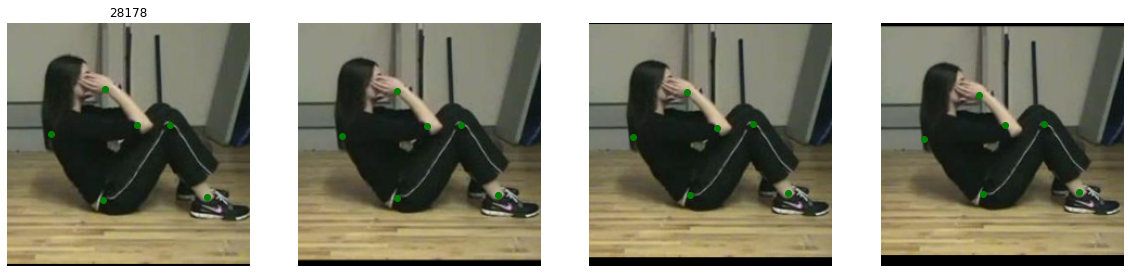

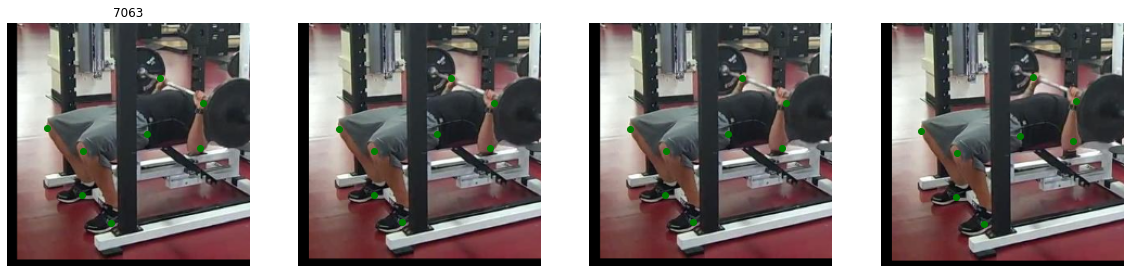

In [532]:
from src.datasets.datasets_common import UNNORMALIZE
for idx in [
    29199, 31210, 7290, 33342, 28749, 6899, 17037, 28178, 7063, 
#     35422, 29912, 7561, 22543, 17014, 30091, 26030, 25372, 7350,
#     30632, 28633, 34307, 32084, 30320, 5486
]: # tough samples (seqlen=4)
    sample = ds[idx]
    
    fig, ax = plt.subplots(1,seqlen,figsize=(seqlen * 5,5))
    ax[0].set_title(idx)
    
    for i in range(seqlen):
        ax[i].imshow(UNNORMALIZE(sample['video'])[i].permute(1,2,0))
        ax[i].set_axis_off()

#         bbox = sample['bbox'][i]
#         plot_bbox(ax[i], bbox)
        
        kp_2d_ = sample["kp_2d"][i]
        mask = kp_2d_[:,2] > 0.
        kp_2d_ = (kp_2d_[:,:2][mask].clone() + 1) / 2 * 224
        ax[i].scatter(kp_2d_[:,0], kp_2d_[:,1], c='g')  
    
#         kp_2d_ = sample["kp_2d_orig"][i]
#         mask = kp_2d_[:,2] > 0.
#         ax[i].scatter(kp_2d_[:,0][mask], kp_2d_[:,1][mask], c='g')  
#     break
        

# InstaVariety - 1556/2545 videos downloaded

## how to preproc? how to read?

### everything should be in VIBE

In [219]:
preproc_file = "/cvlabsrc1/cvlab/dataset_InstaVariety/insta_variety_preproc/insta_train_db.h5"

In [3]:
dset_path = "/cvlabsrc1/cvlab/dataset_InstaVariety/"

In [11]:
from glob import glob
sorted(glob(dset_path+"tfrecords/InstaVariety_tracks/triplejump/44066924_252710788756802_5879790385475092480_n/087a/*"))

['/cvlabsrc1/cvlab/dataset_InstaVariety/tfrecords/InstaVariety_tracks/triplejump/44066924_252710788756802_5879790385475092480_n/087a/00000518.json',
 '/cvlabsrc1/cvlab/dataset_InstaVariety/tfrecords/InstaVariety_tracks/triplejump/44066924_252710788756802_5879790385475092480_n/087a/00000519.json',
 '/cvlabsrc1/cvlab/dataset_InstaVariety/tfrecords/InstaVariety_tracks/triplejump/44066924_252710788756802_5879790385475092480_n/087a/00000520.json',
 '/cvlabsrc1/cvlab/dataset_InstaVariety/tfrecords/InstaVariety_tracks/triplejump/44066924_252710788756802_5879790385475092480_n/087a/00000521.json',
 '/cvlabsrc1/cvlab/dataset_InstaVariety/tfrecords/InstaVariety_tracks/triplejump/44066924_252710788756802_5879790385475092480_n/087a/00000522.json',
 '/cvlabsrc1/cvlab/dataset_InstaVariety/tfrecords/InstaVariety_tracks/triplejump/44066924_252710788756802_5879790385475092480_n/087a/00000523.json',
 '/cvlabsrc1/cvlab/dataset_InstaVariety/tfrecords/InstaVariety_tracks/triplejump/44066924_252710788756802_

In [12]:
import json

In [13]:
path = "/cvlabsrc1/cvlab/dataset_InstaVariety/tfrecords/InstaVariety_tracks/triplejump/44066924_252710788756802_5879790385475092480_n/087a/00000518.json"

with open(path, "r") as f:
    data = json.load(f)

In [16]:
data

{'Hip': {'logits': 0.0, 'probability': None, 'x': 0.0, 'y': 0.0},
 'L Ankle': {'logits': 0.0, 'probability': None, 'x': 0.0, 'y': 0.0},
 'L Big Toe': {'logits': 0.0, 'probability': None, 'x': 0.0, 'y': 0.0},
 'L Ear': {'logits': 0.0, 'probability': None, 'x': 0.0, 'y': 0.0},
 'L Elbow': {'logits': 0.0, 'probability': None, 'x': 0.0, 'y': 0.0},
 'L Eye': {'logits': 0.0, 'probability': None, 'x': 0.0, 'y': 0.0},
 'L Heel': {'logits': 0.0, 'probability': None, 'x': 0.0, 'y': 0.0},
 'L Hip': {'logits': 0.0, 'probability': None, 'x': 0.0, 'y': 0.0},
 'L Knee': {'logits': 0.0, 'probability': None, 'x': 0.0, 'y': 0.0},
 'L Shoulder': {'logits': 0.0, 'probability': None, 'x': 0.0, 'y': 0.0},
 'L Small Toe': {'logits': 0.0, 'probability': None, 'x': 0.0, 'y': 0.0},
 'L Wrist': {'logits': 0.0, 'probability': None, 'x': 0.0, 'y': 0.0},
 'Neck': {'logits': 0.0, 'probability': None, 'x': 0.0, 'y': 0.0},
 'Nose': {'logits': 0.0, 'probability': None, 'x': 0.0, 'y': 0.0},
 'R Ankle': {'logits': 0.2214

# preparing videos InstaVariety

Lots of troubles with `youtube-dl(c)` package...

In [89]:
insta_path_videos = "/cvlabsrc1/cvlab/dataset_InstaVariety/videos"
all_videos_cvlabsrc1 = sorted(glob(f"{insta_path_videos}/*/*.mp4"))
all_videos_cvlabsrc1 = [line[len(insta_path_videos)+1:-4] for line in all_videos_cvlabsrc1]
print(len(all_videos_cvlabsrc1), all_videos_cvlabsrc1[0])
### a lot of videos without annotations!

5061 3pointer/37657061_2113166932343191_3509095693669105664_n


In [160]:
with open('/cvlabsrc1/cvlab/dataset_InstaVariety/instavariety/insta_variety_train.txt', 'r') as f:
    train_lines = f.readlines()
train_lines = sorted([line.strip() for line in train_lines])

with open('/cvlabsrc1/cvlab/dataset_InstaVariety/instavariety/insta_variety_test.txt', 'r') as f:
    test_lines = f.readlines()
test_lines = sorted([line.strip() for line in test_lines])

all_lines = train_lines + test_lines
print("There should be:")
print(len(all_lines))

There should be:
2545


In [161]:
num = 0
for line in tqdm(all_lines):
    already_in_cvlabsrc1 = line in all_videos_cvlabsrc1
    num += already_in_cvlabsrc1
print("There are now (videos folder):")
print(f"{num} / {len(all_lines)}")

100%|█████████████████████████████████████████████| 2545/2545 [00:00<00:00, 26454.19it/s]

There are now (videos folder):
1556 / 2545


In [162]:
with open('/cvlabsrc1/cvlab/dataset_InstaVariety/instavariety/insta_variety_train.txt', 'r') as f:
    train_lines = f.readlines()
train_lines = sorted([line.strip() for line in train_lines])

with open('/cvlabsrc1/cvlab/dataset_InstaVariety/instavariety/insta_variety_test.txt', 'r') as f:
    test_lines = f.readlines()
test_lines = sorted([line.strip() for line in test_lines])

all_lines = train_lines + test_lines
print("There should be:")
print(len(all_lines))

There should be:
2545


In [163]:
savedir = "/cvlabsrc1/cvlab/dataset_InstaVariety/videos"
with open('/cvlabsrc1/cvlab/dataset_InstaVariety/instavariety/insta_variety_train.txt', 'r') as f:
    train_lines = f.readlines()
train_lines = [f"{savedir}/{line.strip()}.mp4" for line in train_lines]
    
with open('/cvlabsrc1/cvlab/dataset_InstaVariety/instavariety/insta_variety_test.txt', 'r') as f:
    test_lines = f.readlines()
test_lines = [f"{savedir}/{line.strip()}.mp4" for line in test_lines]

all_lines = train_lines + test_lines
len(all_lines)

2545

In [164]:
with open("/cvlabsrc1/cvlab/dataset_InstaVariety/instavariety/to_download.json", "rb") as f:
    to_download = json.load(f)
to_download

['deadlift/44782930_274333323423402_7225259367065452544_n',
 'polevault/44743319_482007842320017_944713860165669605_n',
 'golf/44726557_1441421825960164_5066607107583770624_n',
 'barre/44803142_778102415854326_7229757078292660224_n',
 'backflip/44703964_492608361148207_5050433785460424704_n',
 'sparring/44669092_158794148408077_9216052338840567808_n',
 'polevault/43723036_961936950680268_4442002662244629790_n',
 'deadlift/45183990_365587763986105_8562846933343797248_n',
 'dunking/44128396_278931419308632_5764412626948148892_n',
 'dunking/44636340_137001470601961_9198910559604278528_n',
 'deadlift/44869023_688079081574559_7035574949641191424_n',
 'golfcoach/44505802_2203243149719809_2168066325283340288_n',
 'golfswing/45029883_569904123440216_2980503263190341323_n',
 'triplejump/45181641_1398643270267181_8359519595253465088_n',
 'circuitworkout/44067499_2101748780078521_4794892693161377792_n',
 'dribblingdrills/42477866_168665704045189_8086368110543634432_n',
 'performancetraining/43769

In [123]:
with open('/cvlabsrc1/cvlab/dataset_InstaVariety/instavariety/InstaVariety.json','rb') as f:
    insta_data = json.load(f)

In [155]:
to_download_ids = []
for vid_name in tqdm(to_download):
    for i, post in enumerate(insta_data):
        tag = post['download_tag']
        try:
            dl_name = post['urls'][0][:-4]
        except IndexError:
            continue
        cur_name = f"{tag}/{dl_name}"
        if cur_name == vid_name:
            to_download_ids.append(i)
            break
            
with open('/cvlabsrc1/cvlab/dataset_InstaVariety/instavariety/to_download_ids.json','w') as f:
    json.dump(sorted(to_download_ids), f)

100%|█████████████████████████████████████████████████| 989/989 [00:08<00:00, 120.55it/s]


# MPII3D - ask Soumava for data

## .pt files in TCMR format are in /cvlabdata2

In [218]:
mpii3d_path = "/cvlabdata2/home/davydov/videoHMR_SSL/mpii3d"